In [131]:
# import tensorflow as tf

# # Check GPU availability
# print("GPU Available:", tf.test.is_gpu_available())

# # Check TPU availability
# tpu_available = Falsea
# devices = tf.config.list_logical_devices()
# for device in devices:
#     if device.device_type == 'TPU':
#         tpu_available = True
#         break

# print("TPU Available:", tpu_available)

In [132]:
import tensorflow as tf

In [133]:
import os


In [134]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
# # import os

# # Path to the root directory of your dataset
# dataset_root = '/content/drive/My Drive/Covid19-dataset'

# # Path to the training data folder
# train_folder_path = os.path.join(dataset_root, 'train')

# # Path to the testing data folder
# test_folder_path = os.path.join(dataset_root, 'test')

# # Function to list image files in a folder
# def list_image_files(folder_path):
#     # List all files in the folder
#     files = os.listdir(folder_path)
#     # Filter only image files
#     image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
#     return image_files

# # List image files in training data folder
# train_image_files = list_image_files(train_folder_path)

# # List image files in testing data folder
# test_image_files = list_image_files(test_folder_path)

# # Now you can use train_image_files and test_image_files to build your model


In [136]:
os.listdir('/content/drive/MyDrive/Covid19-dataset')

['train', 'test']

In [137]:
import cv2

In [138]:
img= cv2.imread('/content/drive/MyDrive/Covid19-dataset/test/Normal/0102.jpeg')

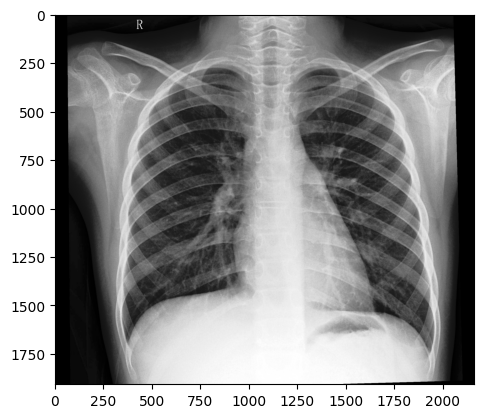

In [139]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [140]:
img.shape

(1907, 2165, 3)

In [141]:
urls = os.listdir('/content/drive/MyDrive/Covid19-dataset/train/Covid')

In [142]:
path = "/content/drive/MyDrive/Covid19-dataset/train/Covid" + urls[0]

In [143]:
path

'/content/drive/MyDrive/Covid19-dataset/train/Covid019.png'

In [144]:
import pandas as pd
import numpy as np

In [145]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (500, 500))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

labels:
0-normal
1-covid
2-viral pneumonia

In [146]:
covid_path='/content/drive/MyDrive/Covid19-dataset/train/Covid'
covidurl=os.listdir('/content/drive/MyDrive/Covid19-dataset/train/Covid')
covidimages,covidtargets=loadImages(covid_path,covidurl,1)

In [147]:
len(covidimages),len(covidurl)

(111, 111)

In [148]:
normal_path='/content/drive/MyDrive/Covid19-dataset/train/Normal'
normalurl=os.listdir('/content/drive/MyDrive/Covid19-dataset/train/Normal')
normalimages,normaltarget =loadImages(normal_path,normalurl,0)

In [149]:
viral_path='/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia'
viralurl=os.listdir('/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia')
viralimages,viraltarget =loadImages(viral_path,viralurl,2)

In [150]:
covidImages = np.asarray(covidimages)
normalImages = np.asarray(normalimages)
viralp=np.asarray(viralimages)

In [151]:
covidImages.shape

(111, 500, 500, 3)

In [152]:
normalImages.shape

(70, 500, 500, 3)

In [153]:
viralp.shape

(70, 500, 500, 3)

In [154]:
data = np.r_[covidImages, normalImages, viralp]

In [155]:
data.shape

(251, 500, 500, 3)

In [156]:
targets = np.r_[covidtargets,normaltarget, viraltarget]

In [157]:
targets.shape

(251,)

In [158]:
# indices = np.random.permutation(data.shape[0])

# # Shuffle data and target arrays using the same permutation
# shuffled_data = data[indices]
# shuffled_target = targets[indices]

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [160]:
# shuffled_data = shuffled_data / 255.0

In [161]:
x_train,x_val, y_train,y_val = train_test_split(data,targets,random_state = 42)
print(x_train.shape)
print(x_val.shape)

(188, 500, 500, 3)
(63, 500, 500, 3)


In [162]:
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1,1))
y_val = encoder.fit_transform(y_val.reshape(-1,1))

In [163]:
y_train.shape

(188, 3)

In [164]:
y_val.shape

(63, 3)

In [165]:
x_train =x_train/255
x_val=x_val/255

In [166]:
# from tensorflow.keras.utils import to_categorical

# shuffled_target = to_categorical(shuffled_target)

In [167]:
# shuffled_target.shape


In [168]:
# x_train, x_test, y_train, y_test = train_test_split(shuffled_data, shuffled_target, test_size=0.25)

In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [170]:
model = Sequential([
    Conv2D(32, 3, input_shape=(500, 500, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(8, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 249, 249, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 247, 247, 16)      4624      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 123, 123, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 121, 121, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 60, 60, 16)       

In [171]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 249, 249, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 247, 247, 16)      4624      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 123, 123, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 121, 121, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 60, 60, 16)       

In [172]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [195]:
model.fit(x_train, y_train,batch_size=32,epochs=13,validation_data=(x_val, y_val))

Epoch 1/13
6/6 [==============================] - 2s 301ms/step - loss: 0.5285 - accuracy: 0.7287 - val_loss: 0.5182 - val_accuracy: 0.7937
Epoch 2/13
6/6 [==============================] - 1s 201ms/step - loss: 0.5019 - accuracy: 0.7500 - val_loss: 0.4986 - val_accuracy: 0.7937
Epoch 3/13
6/6 [==============================] - 1s 176ms/step - loss: 0.4300 - accuracy: 0.8138 - val_loss: 0.4790 - val_accuracy: 0.8413
Epoch 4/13
6/6 [==============================] - 1s 175ms/step - loss: 0.3215 - accuracy: 0.8511 - val_loss: 0.4597 - val_accuracy: 0.8413
Epoch 5/13
6/6 [==============================] - 1s 201ms/step - loss: 0.4863 - accuracy: 0.8245 - val_loss: 0.4372 - val_accuracy: 0.8730
Epoch 6/13
6/6 [==============================] - 1s 199ms/step - loss: 0.3040 - accuracy: 0.8989 - val_loss: 0.5698 - val_accuracy: 0.8095
Epoch 7/13
6/6 [==============================] - 1s 203ms/step - loss: 0.4885 - accuracy: 0.8245 - val_loss: 0.5307 - val_accuracy: 0.8254
Epoch 8/13
6/6 [====

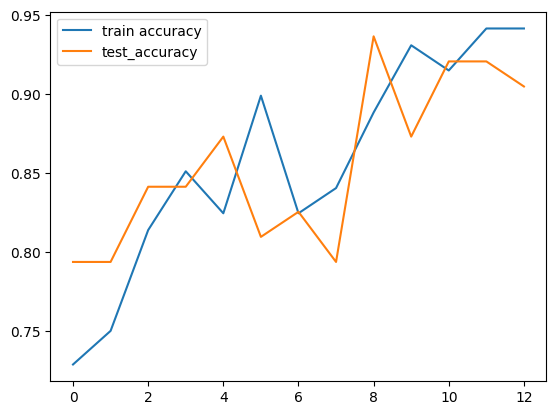

In [196]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

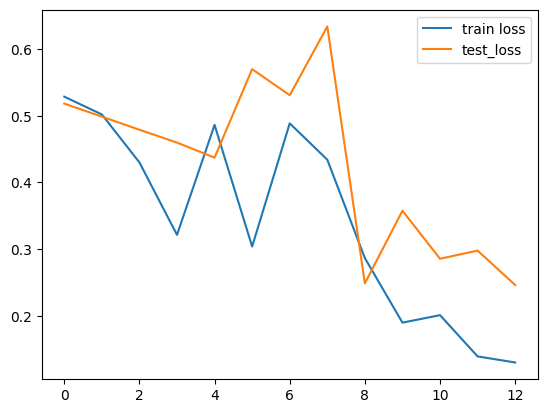

In [197]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [198]:
covid_path='/content/drive/MyDrive/Covid19-dataset/test/Covid'
covidurl=os.listdir('/content/drive/MyDrive/Covid19-dataset/test/Covid')
covidimages,covidtargets=loadImages(covid_path,covidurl,1)

In [199]:
normal_path='/content/drive/MyDrive/Covid19-dataset/test/Normal'
normalurl=os.listdir('/content/drive/MyDrive/Covid19-dataset/test/Normal')
normalimages,normaltarget =loadImages(normal_path,normalurl,0)

In [200]:
viral_path='/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia'
viralurl=os.listdir('/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia')
viralimages,viraltarget =loadImages(viral_path,viralurl,2)

In [201]:
covidImages = np.asarray(covidimages)
normalImages = np.asarray(normalimages)
viralp=np.asarray(viralimages)

In [202]:
covidImages.shape

(26, 500, 500, 3)

In [203]:
covidImages.shape

(26, 500, 500, 3)

In [204]:
covidImages.shape

(26, 500, 500, 3)

In [205]:

data_test = np.r_[covidImages, normalImages, viralp]

In [206]:
targets_test = np.r_[covidtargets,normaltarget, viraltarget]

In [207]:
data_test.shape

(66, 500, 500, 3)

In [208]:
data_test = data_test / 255.0

In [209]:
indices = np.random.permutation(data_test.shape[0])

# Shuffle data and target arrays using the same permutation
data_test = data_test[indices]
targets_test= targets_test[indices]

In [210]:
predictions = model.predict(data_test)


3/3 [==============================] - 0s 49ms/step


In [211]:
predictions

array([[1.13295873e-05, 9.99988675e-01, 5.44233458e-08],
       [5.25497738e-03, 3.74061754e-04, 9.94370997e-01],
       [3.96689624e-02, 9.60265517e-01, 6.54304749e-05],
       [8.90920579e-01, 1.04160227e-01, 4.91918297e-03],
       [4.94352281e-01, 3.64563358e-03, 5.02002060e-01],
       [5.00390112e-01, 4.97947246e-01, 1.66264095e-03],
       [1.88136380e-02, 5.49013680e-03, 9.75696266e-01],
       [1.55752584e-01, 3.16093070e-03, 8.41086507e-01],
       [2.29191573e-06, 9.99997735e-01, 5.30101874e-09],
       [8.44744623e-01, 2.77186534e-03, 1.52483433e-01],
       [8.84328663e-01, 2.42959964e-03, 1.13241725e-01],
       [8.88752401e-01, 2.71680718e-03, 1.08530752e-01],
       [8.65025282e-01, 2.32858141e-03, 1.32646143e-01],
       [2.14577781e-07, 9.99999762e-01, 9.97688043e-10],
       [1.25696408e-02, 4.92921215e-04, 9.86937463e-01],
       [2.37534943e-04, 9.99761641e-01, 8.39193319e-07],
       [5.77292030e-06, 9.99993920e-01, 3.48165230e-07],
       [7.78618960e-06, 9.99992

In [212]:
predicted_labels = np.argmax(predictions, axis=1)

In [213]:
predicted_labels

array([1, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0])

In [214]:
targets_test

array([1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0])

In [215]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [216]:
accuracy = accuracy_score(targets_test, predicted_labels)
print("Accuracy:", accuracy*100)


Accuracy: 81.81818181818183
